In [1]:
#Importing All the Needed Libraries
%reset -f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

from scipy import stats



In [2]:
# Load the Excel file
file_path = 'extracted_data.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)
print(df)

FileNotFoundError: [Errno 2] No such file or directory: 'extracted_data.xlsx'

In [24]:

# Extract columns 'x' and 'y'
x_column = df['Input Frequency (GHz)'].values  # Replace 'x' with the exact name of the column in the Excel file
y_column = df['Gain (dBm)'].values  # Replace 'y' with the exact name of the column in the Excel file

# Print or work with the extracted columns
print(x_column)
print(y_column)


KeyError: 'Input Frequency (GHz)'

In [32]:
def find_x_for_y(x_values, y_values, target_y, tolerance=1e-6):
    """
    Find all x values corresponding to a specific y value, including interpolated values.

    Args:
    x_values (np.array): Array of x values.
    y_values (np.array): Array of y values (e.g., sin(x)).
    target_y (float): The target y value to find the corresponding x value(s) for.
    tolerance (float): Tolerance to handle floating-point comparisons.

    Returns:
    np.array: Array of x values corresponding to the target_y.
    """
    # Ensure x and y are numpy arrays
    x_values = np.asarray(x_values)
    y_values = np.asarray(y_values)

    # Find indices where the exact y values match (within tolerance)
    exact_indices = np.where(np.abs(y_values - target_y) <= tolerance)[0]
    
    # Initialize list to store found x values
    x_results = x_values[exact_indices].tolist()
    
    # Sort x and y values for interpolation (if not already sorted)
    sorted_indices = np.argsort(x_values)
    sorted_x = x_values[sorted_indices]
    sorted_y = y_values[sorted_indices]

    # Interpolate function
    interp_func = interp1d(sorted_y, sorted_x, bounds_error=False, fill_value="extrapolate", kind='linear')

    # Check interpolation results between every pair of points
    for i in range(len(sorted_y) - 1):
        # If the target y is between sorted_y[i] and sorted_y[i+1], interpolate
        if (sorted_y[i] <= target_y <= sorted_y[i+1]) or (sorted_y[i] >= target_y >= sorted_y[i+1]):
            x_interpolated = interp_func(target_y)
            x_results.append(x_interpolated)
    
    # Remove duplicates and return sorted x values
    return np.unique(x_results)

In [25]:


# Function to calculate moving average
def moving_average(y_values, window_size=3):
    """
    Calculate moving average with a specified window size.
    By default, a 3-point moving average is used.

    Args:
    y_values (list or np.array): List or array of y-values.
    window_size (int): The window size for the moving average.

    Returns:
    np.array: The moving average values with NaN for points that don't have enough neighbors.
    """
    return np.convolve(y_values, np.ones(window_size) / window_size, mode='same')


# Calculate the moving average with a 3-point window
y_moving_avg = moving_average(y_column, window_size=3)

# Find the maximum gain
max_gain = np.max(y_moving_avg)

# Calculate the 3 dBm drop from the maximum gain
drop_3db = float(max_gain - 3)

# Find the x value(s) for a specific interpolated y value, say y = 13 and y = 11
target_y = [drop_3db]

x_for_target_y = find_x_for_y(x_column, y_moving_avg, max_gain)

print(f"X values corresponding to max_gain = {max_gain}: {x_for_target_y}")

target_y = [drop_3db]

x_for_target_y = find_x_for_y(x_column, y_moving_avg, target_y)

print(f"X values corresponding to y = {target_y}: {x_for_target_y}")



# Plot original 'y' values and moving average
plt.figure(figsize=(10, 6))
plt.plot(x_column, y_column, label='Observation', color='blue', marker='o')
plt.plot(x_column[1:-1], y_moving_avg[1:-1], label='Moving Average (3-point)', color='red', linestyle='--')
#plt.axhline(y=drop_3db, color='black', linestyle='--', label='3 dBm drop from Max Gain')

# Sample data (replace with your actual values)
x_values = np.array([1.47, 1.365])  # Frequencies in GHz
y_values = np.array([drop_3db, drop_3db])  # 3 dB drop values

# Find bandwidth (difference between the two frequencies)
bandwidth = np.abs(x_values[1] - x_values[0])

# Plot the scatter plot with markers
#plt.scatter(x_values, y_values, color='red', label='3 dB drop points')

# Plot horizontal line at the 3 dB drop level
plt.axhline(y=drop_3db, color='blue', linestyle='--', label='3 dB drop line')

# Add vertical lines from points to horizontal line
for x in x_values:
    plt.axvline(x=x, color='green', linestyle='--')

# Annotate the points on the scatter plot
for i, (x, y) in enumerate(zip(x_values, y_values)):
    plt.annotate(f'({x}, {y})', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Highlight the bandwidth
plt.hlines(y=np.average(y_column), xmin=x_values[0], xmax=x_values[1], color='magenta', linewidth=2)
plt.text((x_values[0] + x_values[1]) / 2, np.average(y_column)-2, f'Bandwidth = {bandwidth:.3f} GHz', 
         ha='center', color='magenta')

plt.scatter([1.47,1.365],[drop_3db,drop_3db])

# Add labels and title
plt.xlabel('Frequency GHz')
plt.ylabel('Gain dBm')
plt.title('Filter : Gain vs Frequency')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


NameError: name 'y_column' is not defined

In [26]:
# Find the maximum gain
max_gain = np.max(y_column)

# Calculate the 3 dBm drop from the maximum gain
drop_3db = max_gain - 3

# Find the x values (frequencies) where the gain drops by 3 dBm
indices = np.where(y_column <= drop_3db)[0]  # Indices where the gain is less than or equal to 3 dBm below the max
frequencies_at_3db = x_column[indices]

# Plot the original gain and the 3 dBm drop level
plt.figure(figsize=(10, 6))
plt.plot(x_column, y_column, label='Gain (dBm)', color='blue', marker='o')
plt.axhline(y=drop_3db, color='red', linestyle='--', label='3 dBm Drop Level')

# Draw vertical lines and annotate the corresponding x-values
for i in indices:
    plt.axvline(x=x_column[i], color='green', linestyle=':', ymax=(y_column[i] - plt.ylim()[0]) / (plt.ylim()[1] - plt.ylim()[0]))  # Draw vertical line
    plt.text(x_column[i], drop_3db - 0.5, f'{x_column[i]:.2f} GHz', color='black', ha='center')  # Annotate the x value

# Add labels, title, and legend
plt.xlabel('Frequency (GHz)')
plt.ylabel('Gain (dBm)')
plt.title('Gain vs Frequency with 3 dBm Drop from Maximum')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Print the frequencies at 3 dBm drop
print("Frequencies at 3 dBm drop from the maximum gain:")
print(frequencies_at_3db)

NameError: name 'y_column' is not defined

In [27]:
w0 = [200,500]
p0 = [-8.71,-8.3]

w = [300,700]
p = [-24.75,-23.73]

w_natural = [200,500]
p_natural = [-24.75,-77.67]



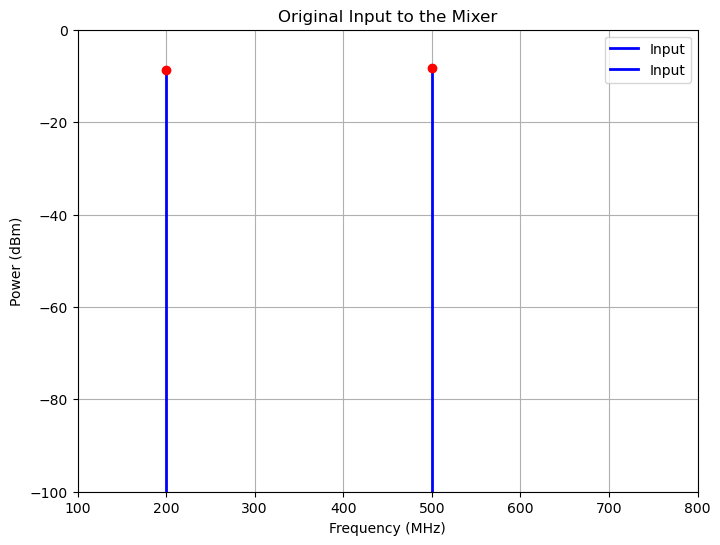

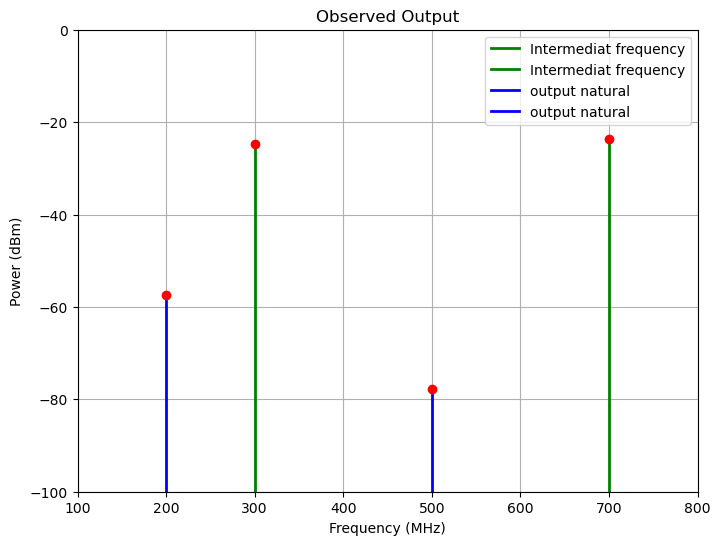

In [28]:
import matplotlib.pyplot as plt

# Data for original input frequencies and power
w0 = [200, 500]
p0 = [-8.71, -8.3]

# Data for observed frequencies and power through the mixer
w = [300, 700]
p = [-24.75, -23.73]

# Data for natural frequencies and power
w_natural = [200, 500]
p_natural = [-57.4, -77.67]

# Function to plot vertical lines from -100 dBm to the data points
def plot_spectrum(w, p, title,ls,l):
    
    # Plot vertical lines from -100 dBm to the respective points
    for i in range(len(w)):
        plt.plot([w[i], w[i]], [-100, p[i]], ls, lw=2, label =f"{l}" )
        plt.plot(w[i], p[i], 'ro')  # Plot the data point
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Power (dBm)')
    plt.ylim([-100, 0])
    plt.xlim(100,800)
    plt.grid(True)
    plt.legend()
    
plt.figure(figsize=(8, 6))

# Plot for original input (w0, p0)
plot_spectrum(w0, p0, 'Original Input to the Mixer',"-b","Input")
plt.show()
plt.figure(figsize=(8, 6))

# Plot for observed output (w, p)
plot_spectrum(w, p, 'Observed Output: w and p',"-g","Intermediat frequency")

# Plot for natural frequencies (w_natural, p_natural)
plot_spectrum(w_natural, p_natural, 'Observed Output',"-b","output natural")
plt.show()

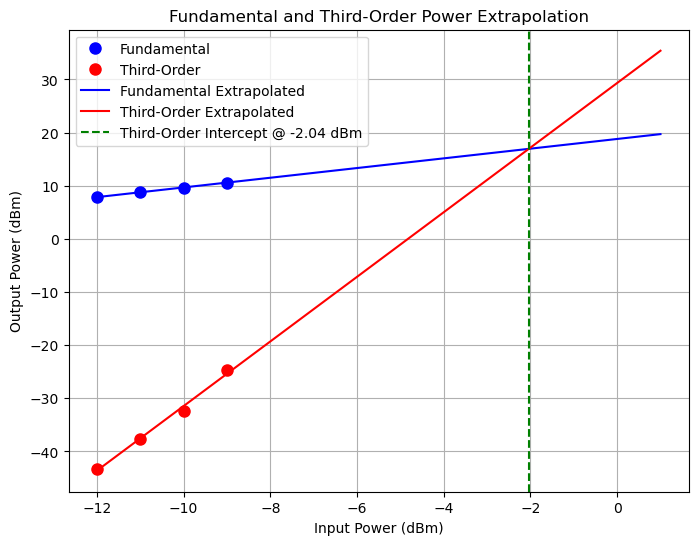

(-2.037158892974648, 16.938111089607123)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Given data
input_power = np.array([-12, -11, -10, -9])
third_order_power = np.array([-43.27, -37.62, -32.39, -24.75])
fundamental_power = np.array([7.8, 8.86, 9.64, 10.58])

# Linear regression for both fundamental and third-order powers
slope_fund, intercept_fund, _, _, _ = linregress(input_power, fundamental_power)
slope_third, intercept_third, _, _, _ = linregress(input_power, third_order_power)

# Extrapolating the lines
input_power_extrapolated = np.linspace(min(input_power), max(input_power) + 10, 100)

fundamental_extrapolated = slope_fund * input_power_extrapolated + intercept_fund
third_order_extrapolated = slope_third * input_power_extrapolated + intercept_third

# Finding the third-order intercept point
intercept_power = (intercept_fund - intercept_third) / (slope_third - slope_fund)
intercept_value_fund = slope_fund * intercept_power + intercept_fund
intercept_value_third = slope_third * intercept_power + intercept_third

# Plotting the results
plt.figure(figsize=(8,6))
plt.plot(input_power, fundamental_power, 'bo', label='Fundamental', markersize=8)
plt.plot(input_power, third_order_power, 'ro', label='Third-Order', markersize=8)
plt.plot(input_power_extrapolated, fundamental_extrapolated, 'b-', label='Fundamental Extrapolated')
plt.plot(input_power_extrapolated, third_order_extrapolated, 'r-', label='Third-Order Extrapolated')
plt.axvline(x=intercept_power, color='green', linestyle='--', label=f'Third-Order Intercept @ {intercept_power:.2f} dBm')
plt.title('Fundamental and Third-Order Power Extrapolation')
plt.xlabel('Input Power (dBm)')
plt.ylabel('Output Power (dBm)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

(intercept_power, intercept_value_fund)


    pin   pout  pout.1   Gain
0   -20  -1.92    1.92 -18.08
1   -19  -2.85    2.85 -16.15
2   -18  -3.88    3.88 -14.12
3   -17  -4.82    4.82 -12.18
4   -16  -5.84    5.84 -10.16
5   -15  -6.82    6.82  -8.18
6   -14  -7.83    7.83  -6.17
7   -13  -8.71    8.71  -4.29
8   -12  -9.67    9.67  -2.33
9   -11 -10.77   10.77  -0.23
10  -10 -11.72   11.72   1.72
11   -9 -12.67   12.67   3.67
12   -8 -13.63   13.63   5.63
13   -7 -14.50   14.50   7.50
14   -6 -15.29   15.29   9.29
15   -5 -15.89   15.89  10.89
16   -4 -16.26   16.26  12.26
17   -3 -16.51   16.51  13.51
18   -2 -16.71   16.71  14.71
19   -1 -16.84   16.84  15.84
20    0 -16.93   16.93  16.93
Pin Array: [-20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3
  -2  -1   0]
Gain Array: [21.92 21.85 21.88 21.82 21.84 21.82 21.83 21.71 21.67 21.77 21.72 21.67
 21.63 21.5  21.29 20.89 20.26 19.51 18.71 17.84 16.93]


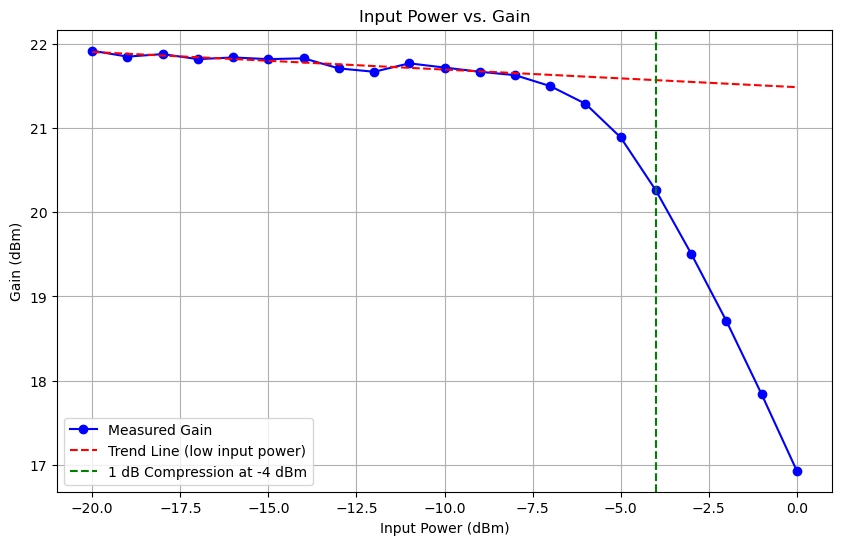

1 dB Compression Point is at -4 dBm


In [30]:

# Load the Excel file
file_path = 'amplifier.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path, sheet_name='Sheet1')  # Load data from 'Sheet1'
print(df)
pout_array = df['pout.1'].to_numpy()

# Extract 'Pin' and 'Gain' columns into NumPy arrays
pin_array = df['pin'].to_numpy()
gain_array = (pout_array - pin_array)

# Print the arrays
print("Pin Array:", pin_array)
print("Gain Array:", gain_array)

# Input power and gain data (replace with your actual data)
power_in = pin_array
gain = gain_array
# Plot the data
plt.figure(figsize=(10,6))
plt.plot(power_in, gain, 'bo-', label='Measured Gain')
plt.xlabel('Input Power (dBm)')
plt.ylabel('Gain (dBm)')
plt.title('Input Power vs. Gain')

# Trend line for the first 10 points (small-signal gain region)
initial_power = power_in[:10]
initial_gain = gain[:10]

# Fit a linear trend line
slope, intercept, r_value, p_value, std_err = stats.linregress(initial_power, initial_gain)
trend_line = intercept + slope * power_in

# Plot the trend line
plt.plot(power_in, trend_line, 'r--', label='Trend Line (low input power)')

# Calculate the 1 dB compression point
compression_point = None
for i in range(10, len(gain)):
    expected_gain = intercept + slope * power_in[i]
    actual_gain = gain[i]
    if actual_gain <= expected_gain - 1:  # 1 dB compression condition
        compression_point = power_in[i]
        break

# Highlight the 1 dB compression point
if compression_point is not None:
    plt.axvline(compression_point, color='g', linestyle='--', label=f'1 dB Compression at {compression_point} dBm')
    plt.legend()

# Show plot
plt.grid(True)
plt.legend()
plt.show()

# Print the compression point
if compression_point is not None:
    print(f"1 dB Compression Point is at {compression_point} dBm")
else:
    print("1 dB Compression Point not found within the data range.")
